# 2. Analisis exploratoria de datos - EDA - I
#### [Analisis exploratoria de datos  - introduccion](#introduction)
#### [Elementos y funciones de Pandas para el análisis exploratorio de datos - I](#steps)
#### [Ejemplo de analisis exploratoria de datos](#example)

<a id="introduction"></a>
## Analisis exploratoria de datos - introduccion

Imaginemos que queremos predecir el precio de la casa en función de sus características como: el tamaño de la casa, el número de habitaciones, el número de banos, la localización, etc., sabiendo los precios y vendas historicas. 
Entonces necesitamos preparar estos datos para el algoritmo de aprendizaje automático. Así que el precio será el objetivo de datos (salida) y las características de la casa (número de habitaciones, tamaño, localización) serán la entrada. Como los algoritmos están ampliamente disponibles entonces el problema se reduce a preparar bien los datos.

Qué necesitamos de los datos:

* necesitamos asegurarnos de que los datos estén completos, que no falten características que influye el precio de la casa
* necesitamos asegurarnos de que los datos no tengan errores, valores de error tipográfico, valores extraordinario grandes o extraordinarios pequeños (valores atípicos)
* que las filas no se repiten
* que las columnas no se repiten
* que no hay valores vacíos en las columnas
* que no hay correlación entre datos de las columnas (si hay una columna con el tamaño de la casa en m^2 y otra columna con el tamaño de la casa en en pies^2 entonces una es redundante)
* cuales variables son categóricas y cuáles son continuas
* finalmente no podemos hacer todas esas operaciones con los ojos vendados, para entender los datos debemos visualizar los datos, ordenarlos y agruparlos.

Hacer todas esas operaciones se llama análisis exploratorio de datos. Este capítulo debería servir más bien como referencia que el curso completo. 

En lenguaje mas formal...

el Análisis Exploratorio de Datos o (EDA) es comprender los conjuntos de datos resumiendo sus características principales a menudo graficándolos visualmente. Este paso es muy importante sobre todo cuando llegamos a modelar los datos con el fin de aplicar machine learning. El trazado en EDA consiste en histogramas, diagrama de caja, diagrama de dispersión y muchos más. A menudo lleva mucho tiempo explorar los datos. A través del proceso de EDA, podemos pedir que se defina la declaración o definición del problema en nuestro conjunto de datos, lo cual es muy importante.

La bibliotecas de Pandas es una herramienta clave en Python para explorar los datos. Sin embargo es muy grande y versatil y es difícil de estudiar y recordar todas las funciones. Por lo tanto, la mejor manera de aprender Pandas y EDA es analizar y comprender un ejemplo particular. Además de Pandas, que es mejor para el procesamiento de datos, necesitamos visualizar los datos usando Matplotlib o biblioteca Seaborn que es particularmente bien integrada con Pandas.

<a id="steps"></a>
## Elementos y funciones de Pandas para el análisis exploratorio de datos - I

Hay varios elementos del procedimiento exploratorio de los datos. Lo mas importante son:

1. Para importar, leer e inspeccionar los datos podemos usar:
  * `df.head(n)` - visualiza las primeras 'n' filas del conjunto de datos (por defecto n=5)
  * `df.tail(n)` - visualiza las últimas 'n' filas del conjunto de datos (por defecto n=5)
  * `df.columns()` - isualiza los nombres de las columnas
  * `df.describe()` - devuelve una tabla que contiene un resumen estadístico básico de los datos.
  * `df.info()` - devuelve informacion sobre tipos de datos en cada columna
  * `df.loc[mascara]` - selecione filas usando "mascara" (ejemplo de mascara (condicion logica): `df['id']>100`), combinando los dos: `df.loc[df['id']>100]` devuelve todas las filas donde columna `id` tiene valor mas grande que `100`
2. Para completar los datos y organizar las columnas:
  * `df.merge()`
  * `df[df.duplicated()] ` - visualiza filas con valores duplicadas atraves todas columnas
  * `df.drop_duplicates(subset=['nombre_columna'])` - eliminar valor duplicadas en la columna
  * `df.drop(['nombre_columna'], axis=1)`           - eliminar columna
  * `df['nueva_columna']=df['nueva_columna']/10.764` añadir otros nuevos (utilizando cálculos)
  * `df.rename(columns={'nombre_columna_vieja': 'nombre_columna_nueva'})` cambiar el nombre de las columna
  * `df['nombre_columna'] = df['nombre_columna'].astype(str)` cambiar tipo de valores de la columna
3. para comprobar de los tipos de datos y eliminar de los valores repetidos, y `NaN` (Not-A-Number: vacias):
  * `df.info()` - devuelve informacion sobre tipos de datos en cada columna 
  * `df.isna().sum()`  - soma de todas valores NaN en cada columna
  * `df['sqft_lot'].isna()` - mascara logica de todos valores `NaN` util combinando con `df[mascara]`, combinando los dos: `df[df['nombre_columna'].isna()]` devuelve todas filas NaN de columna `nombre_columna`.  
  * `df.dropna()` - elimina valores `NaN`, parametro `axis=0` significa eliminar todas filas con valor NaN
4. Para revisar y comprender los datos:
  * `df['nombre_columna'].unique()`      - visualizar valores uniqas de la columna
  * `df['nombre_columna'].value_counts()` - sumar frequencia de valores de la columna (se usa para columnas con valores discretos)
  * `df.groupby(['nombre_columna_1']).mean()` - agrupar los datos de `nombre_columna_1` y devolver los valores promedios de todas otras columnas con respecto agrupacion
  * `df.groupby(['nombre_columna_1','nombre_columna_2']).mean()`  - agrupar los datos de `nombre_columna_1` y `nombre_columna_2`
  * `df['nombre_columna'].nlargest(10)` - visualiza 10 mas grandes valore numericas de la columna
 * `sns.countplot()` - visualiza las frequencia de observaciones de variable discreta 
 * `sns.histplot()`  - visualiza los recuentos de observaciones de variable continua
 * `sns.scatterplot()` - visualiza relacion entre dos variables 
 * `sns.jointplot()` - visualiza relacion entre dos variables junto con los distribuciones
 * `sns.pairplot()` - - visualiza relacion entre varias variables en forma de matriz 
5. Para analizar series de tiempo:
  * `pd.to_datetime()` - convierte columna que contiene valores de fecha y tiempo a formato entendido para Pandas, por ejemplo: `df['date'] = pd.to_datetime(df['date'])` 
  * `pd.DatetimeIndex()` - permite extracion de ano, mes, dia y horario de formato de fecha,  por ejemplo: `df['year'] = pd.DatetimeIndex(df['date']).year` - crea una nueva columna que contiene el valor del año extraído de la columna con el formato de fecha completa 
  * `df.between()` - permite selecionar el rango de fechas (horas)

<a id="example"></a>
## Ejemplo de analisis exploratoria de datos

En el conjunto `kc_house_data.csv'` de datos están presentes los precios de venta de las casas en el condado de King, Estados Unidos. Incluye casas vendidas entre mayo de 2014 y mayo de 2015. Primero debemos saber sobre el conjunto de datos, qué contiene, cuáles son sus características y cuál es la estructura de los datos.

## 1. Importar, leer e inspeccionar los datos

Podemos comenzar importando todas las bibliotecas y cargar el conjunto de datos como se muestra en el módulo anterior 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
import seaborn as sns           #visualisation

In [ ]:
import pandas as pd
df=pd.read_csv('data/kc_house_data.csv',sep=',')

Es útil para ver el tamaño del conjunto de datos, cuántas columnas y filas tiene y cuáles son los nombres de todas las columnas. 

In [ ]:
print('Numero de filas:',df.shape[0])
print('Numero de columnas:',df.shape[1])
print('Nombres de las columnas:',df.columns)

Numero de filas: 21615
Numero de columnas: 21
Nombres de las columnas: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Podemos ver que el conjunto de datos contiene 21613 observaciones con 20 características más el precio de la vivienda. Los nombres de las columnas con descripcion es siguente:

    * "id": Numero de identificacion de la vivienda
    * "Date": Fecha en que se vendió la casa
    * "Price": el precio es el objetivo de predicción
    * "Bedrooms": Número de Dormitorios/Casa
    * "Bathrooms": Número de baños/Casa
    * "Sqft_Living": pies cuadrados de la casa
    * "Sqft_Lot": pies cuadrados del lote
    * "Floors": Total de pisos oniveles) en casa
    * "Waterfront": Casa que tiene vista a la costanera
    * "View": Ha sido visto
    * "Condition": Qué tan buena es la condición ogeneral)
    * "Grade": calificación de vivienda, según el sistema del condado de King
    * "Sqft_above": pies cuadrados de la casa aparte del sótano
    * "Sqft_Basement": pies cuadrados del sótano
    * "Yr_Built": año de construcción
    * "Yr_Renovated": año en que se renovó la casa
    * "Zipcode": código postal
    * "Lat": Coordenada de latitud
    * "Long": Coordenada de longitud
    * "Sqft_Living15": Área de la sala de estar en 2015 oimplica algunas renovaciones)
    * "Sqft_Lot15": área del tamaño del lote en 2015 oimplica algunas renovaciones) 

Veamos las tres primeras filas de los datos para tener una idea de cómo están organizados.

In [ ]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


O ultimas tres filas

In [ ]:
df.tail(3) # mostrar ultimas 3 filas del conjunto

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21614,1523300157,20141015T000000,325000.0,2,0.75,1020,1076.0,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


Obtengamos el resumen estadístico de los conjuntos de datos. 

Si el DataFrame contiene datos numéricos, la descripción contiene esta información para cada columna:

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161500e+04,2.161500e+04,21615.000000,21615.000000,21615.000000,2.161400e+04,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000
mean,4.579945e+09,5.400672e+05,3.370807,2.114724,2079.874763,1.511002e+04,1.494263,0.007541,0.234282,3.409577,7.656812,1788.337173,291.537590,1971.005968,84.394448,98077.936109,47.560039,-122.213873,1986.521351,12779.768864
std,2.876672e+09,3.671167e+05,0.930026,0.770136,918.402073,4.142026e+04,0.539985,0.086513,0.766285,0.650893,1.175421,828.071354,442.564514,29.372179,401.661476,53.503930,0.138565,0.140843,685.367239,27328.234764
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10085.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Para entender mejor 'describir' vamos a descifrar la información que devolvió

* count - el número de valores no vacíos
* mean - El valor promedio (por ejemplo valor promedio del precio de la casa es 5.400881e+05 USD)  
* std - La desviación estándar (por ejemplo deviacion del precio promedio de la casa es 3.671272e+05 USD)  
* min - el valor mínimo.  (por ejemplo valor minimo del precio de la casa es 7.500000e+04 USD)
* 25% - (percentil) eso significa por ejemplo que 25% de los precios son menores que 3.219500e+05  
* 50% - (percentil) eso significa por ejemplo que 50% de los precios son menores que 4.500000e+05  
* 75% - (percentil) eso significa por ejemplo que 75% de los precios son menores que 6.450000e+05  
* max - el valor maximo. (por ejemplo valor maximo del precio de la casa es 7.700000e+06 USD)   

`df.describe()` permite rapdio ver que el número máximo de dormitorios es 33 - eso puede indicar un error en los datos.

Permite insecto todas las filas en las que la columna `dormitorios` tiene un valor mayor que 10

In [ ]:
df.loc[df['bedrooms']>10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8759,1773100755,20140821T000000,520000.0,11,3.00,3000,4960.0,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15872,2402100895,20140625T000000,640000.0,33,1.75,1620,6000.0,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Podemos ver que hay dos casas donde hay un gran número inusual de dormitorios. Podríamos eliminar esas filas más tarde.

## 2. Completar los datos y organizar las columnas

El conjunto de datos tiene un código postal (`zipcode`) de columna, pero no sabemos a qué ciudad corresponde. Pero podemos usar otro conjunto de datos que contenga códigos postales y ciudades correspondientes y combinar las dos tablas. 

In [ ]:
#df_addresses_new['zipcode'] = df_addresses_new['zipcode'].str.replace('-','')

In [ ]:
import pandas as pd
df_addresses=pd.read_csv('data/zipcode_city.csv',sep=',',index_col=[0])

In [ ]:
df_addresses.head()

,zipcode,city
0,98178,Seattle
1,98125,Seattle
2,98028,Kenmore
3,98136,Seattle
4,98074,Sammamish


In [ ]:
df_addresses.shape

(501, 2)

El segundo conjunto de datos `df_addresses` tiene valores repetidos del código postal (501 filas!), por lo que debemos eliminar esos valores repetidos 

In [ ]:
df_addresses=df_addresses.drop_duplicates(subset=['zipcode'])

In [ ]:
df_addresses.shape

(76, 2)

Antes de fusionar los dos conjuntos de datos `df` y `df_addresses` basados en la columna `zipcode`, es recomendable convertir esas columnas en una cadena. 

In [ ]:
df_addresses['zipcode'] = df_addresses['zipcode'].astype(str)
df['zipcode'] = df['zipcode'].astype(str)

Ahora vamos a fusionar los conjuntos de datos. Parametro `left` (izquierda) significa que para cada valor en la tabla izquierda `df` vamos buscar a valor correspondiente en la tabla derecha `df_addresses`.

In [ ]:
df = pd.merge(df, df_addresses, how="left", on="zipcode")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


Teniendo el conjunto de datos completo, eliminemos algunas columnas, por ejemplo columna: `id`, el parametro `axis=1` se refiere a columna)

In [ ]:
df = df.drop(['id'], axis=1)

Vamos a cambiar los nombres de las columnas que parecen crípticas

In [ ]:
df = df.rename(columns={'yr_build': 'year_build', 'yr_renovated': 'year_renovated'})

In [ ]:
print('Numero de columnas:',df.shape[1])

Numero de columnas: 21


Cambiemos de nuevo el tipo del valor del código postal a entero

In [ ]:
df['zipcode'] = df['zipcode'].astype(int)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


## 3. Comprobar de los tipos de datos y eliminar de los valores repetidos, y `Nan`

Despues de combinar y completar los datos vamos a revisar el conjunto en el termino de tipos de datos y valor non-numerical `NaN` (Not-A-Number)

Con funcion `info()` vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21615 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            21615 non-null  object 
 1   price           21615 non-null  float64
 2   bedrooms        21615 non-null  int64  
 3   bathrooms       21615 non-null  float64
 4   sqft_living     21615 non-null  int64  
 5   sqft_lot        21614 non-null  float64
 6   floors          21615 non-null  float64
 7   waterfront      21615 non-null  int64  
 8   view            21615 non-null  int64  
 9   condition       21615 non-null  int64  
 10  grade           21615 non-null  int64  
 11  sqft_above      21615 non-null  int64  
 12  sqft_basement   21615 non-null  int64  
 13  yr_built        21615 non-null  int64  
 14  year_renovated  21615 non-null  int64  
 15  zipcode         21615 non-null  int64  
 16  lat             21615 non-null  float64
 17  long            21615 non-null 

Podemos ver que la mayoría de las columnas tienen 21615 valores no vacíos, excepto la columna `sqft_lot` que muestra 21614 valores no vacíos, lo que significa que en esta columna hay un valor no vacío. Inspeccionemos eso más de cerca. 

In [ ]:
df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          1
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
year_renovated    0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
city              0
dtype: int64

columna `sqft_lot` contiene un valor nonumerico `Nan`

Podemos visualizar esta fila en particular usando el enmascaramiento lógico.

In [ ]:
df[df['sqft_lot'].isna()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
109,20140723T000000,188500.0,2,1.75,1240,NaN,1.0,0,0,4,...,1240,0,1985,0,98198,47.3813,-122.322,1270,4966,Des Moines


Y eliminar esta fila con valor Nan.

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(21614, 21)

In [ ]:
df[df['sqft_lot'].isna()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city


Verifiquemos si el conjunto de datos tiene filas o columnas completamente repetidas 

In [ ]:
df[df.duplicated()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
99,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,5,...,1210,600,1980,0,98038,47.4109,-121.958,1650,135036,Maple Valley
100,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,5,...,1210,600,1980,0,98038,47.4109,-121.958,1650,135036,Maple Valley


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape[0])

number of duplicate rows:  2


Como hay filas duplicadas, eliminémoslas

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(21612, 21)

También podemos eliminar la fila con la casa que tiene 33 dormitorios. 

In [ ]:
#df=df[df['bedrooms']<30]

In [ ]:
#df.shape

## 4. Revisar y comprender los datos seleccionados en términos de tamaño, tipo de datos usando número y nombre de las columnas

Después de fusionarnos sabemos en qué ciudades están las casas. Veamos cuáles son esas ciudades

In [ ]:
df['city'].unique()

array(['Seattle', 'Kenmore', 'Sammamish', 'Union Hill-Novelty Hill',
       'Federal Way', 'Des Moines', 'Maple Valley', 'Bellevue', 'Duvall',
       'Auburn', 'Mercer Island', 'Kent', 'Redmond', 'Issaquah', 'Renton',
       'Newcastle', 'Normandy Park', 'Vashon', 'Covington', 'Kirkland',
       'Black Diamond', 'North Bend', 'Woodinville', 'Burien',
       'Snoqualmie', 'Enumclaw', 'Shoreline', 'Fall City', 'Bothell',
       'Seatac', 'Carnation', 'Medina'], dtype=object)

Y vamos a contarlos

In [ ]:
df['city'].unique().shape
#len(df['city'].unique())

(32,)

Veamos ver cuántas de las casas se vendieron en cada ciudad

In [ ]:
df['city'].value_counts()

Seattle                    7535
Bellevue                   1407
Renton                     1191
Auburn                     1037
Kirkland                    977
Sammamish                   800
Federal Way                 779
Issaquah                    733
Maple Valley                590
Redmond                     574
Covington                   548
Kent                        530
Woodinville                 471
Shoreline                   446
Newcastle                   406
Union Hill-Novelty Hill     405
Des Moines                  336
Snoqualmie                  310
Kenmore                     283
Mercer Island               282
Burien                      269
Normandy Park               254
Enumclaw                    234
North Bend                  221
Bothell                     195
Duvall                      190
Seatac                      136
Carnation                   124
Vashon                      118
Black Diamond               100
Fall City                    81
Medina  

Nos interesan los primeros 10 ciudades donde se vendieron mas casas.

In [ ]:
df['city'].value_counts().nlargest(10)

Seattle         7535
Bellevue        1407
Renton          1191
Auburn          1037
Kirkland         977
Sammamish        800
Federal Way      779
Issaquah         733
Maple Valley     590
Redmond          574
Name: city, dtype: int64

Solamente en ciudad `Seattle`

In [ ]:
df['city'].value_counts()['Seattle']

7535

Vamos utilizar una herramienta más potente llamada `groupby` para organizar y extraer la información aún mejor. Entonces, vamos agrupar todo el conjunto de datos en términos de ciudad y encontrar valores medios - `mean` (`max` o `min`) de cada columna. 

In [ ]:
df.groupby(['city']).mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
city,,,,,,,,,,,,,,,,,,,
Auburn,2.866376e+05,3.413693,2.017358,1928.605593,18906.898746,1.445034,0.000000,0.093539,3.444552,7.350048,1764.862102,163.743491,1979.315333,42.259402,98035.729990,47.314322,-122.225897,1844.349084,16713.778206
Bellevue,8.981876e+05,3.821606,2.401386,2642.721393,13186.778252,1.371357,0.009950,0.403696,3.625444,8.421464,2150.872779,491.848614,1972.755508,96.690832,98005.932480,47.593897,-122.155711,2514.638237,12251.945984
Black Diamond,4.236660e+05,3.290000,2.027500,2137.590000,55465.300000,1.480000,0.000000,0.100000,3.530000,7.400000,2000.340000,137.250000,1979.180000,218.370000,98010.000000,47.333210,-121.999470,2008.760000,47830.270000
Bothell,4.903515e+05,3.548718,2.278205,2253.097436,11314.138462,1.502564,0.000000,0.061538,3.220513,7.774359,1954.558974,298.538462,1982.148718,50.810256,98011.000000,47.755192,-122.201174,2248.076923,9512.087179
Burien,2.403284e+05,2.996283,1.433086,1468.624535,11269.843866,1.159851,0.000000,0.014870,3.245353,6.509294,1234.089219,234.535316,1952.721190,59.052045,98168.000000,47.489700,-122.307877,1471.680297,9744.022305
Carnation,4.556171e+05,3.000000,2.048387,2117.967742,96902.862903,1.504032,0.000000,0.185484,3.153226,7.387097,1983.532258,134.435484,1980.927419,48.370968,98014.000000,47.671488,-121.848532,1929.016129,77979.620968
Covington,3.116321e+05,3.397810,2.126825,1982.259124,18954.771898,1.498175,0.000000,0.032847,3.518248,7.425182,1847.094891,135.164234,1986.381387,58.357664,98042.000000,47.365665,-122.115453,1956.582117,14702.209854
Des Moines,3.001708e+05,3.178571,1.789435,1723.991071,10284.351190,1.223214,0.029762,0.494048,3.377976,7.074405,1478.693452,245.297619,1966.092262,77.113095,98189.517857,47.398730,-122.318027,1695.863095,9379.008929
Duvall,4.247887e+05,3.363158,2.290789,2171.557895,39838.384211,1.721053,0.000000,0.021053,3.073684,7.510526,2036.242105,135.315789,1991.642105,62.973684,98019.000000,47.737096,-121.954832,2103.721053,37016.510526


Parece demasiada información. Veamos cuál fue el precio más alto que alguien pagó en cada ciudad. 

In [ ]:
df.groupby(['city']).max()['price'].nlargest(10)

city
Seattle          7700000.0
Bellevue         7062500.0
Medina           6885000.0
Mercer Island    5300000.0
Kirkland         5110800.0
Shoreline        4500000.0
Sammamish        3200000.0
Newcastle        3000000.0
Issaquah         2700000.0
Normandy Park    2510000.0
Name: price, dtype: float64

En esas ciudades las casas se vendieron por más de un millón de dólares 

Veamos cómo se distribuyeron los precios maximos entre el número de habitaciones. 

In [ ]:
df.groupby(['city','bedrooms']).max()['price'].nlargest(10)

city           bedrooms
Seattle        6           7700000.0
Bellevue       5           7062500.0
Medina         6           6885000.0
               5           5570000.0
Mercer Island  6           5300000.0
Kirkland       5           5110800.0
Mercer Island  5           4668000.0
Shoreline      5           4500000.0
Bellevue       4           4489000.0
Medina         4           4000000.0
Name: price, dtype: float64

Veamos las casas mas vendidas con respecto al número de habitaciones  

In [ ]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2759
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

A veces es más fácil ver las cosas visualizándolas. El paquete Seaborn es excelente para esta tarea, ya que está bien integrado con Pandas. Para mostrar la frecuencia del valor discreto, usemos seaborn countplot `sns.countplot`, los parámetros son: `data=df`, lo que significa que queremos usar todo nuestro conjunto de datos de Panda y x=`bedrooms` es el nombre de la columna

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

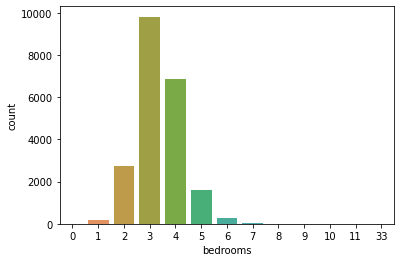

In [ ]:
sns.countplot(data=df, x='bedrooms')

Veamos qué rango de precios en los que se vendieron las casas fueron los más comunes. Como los precios no son variables discretas sino continuas, podemos usar `sns.histplot`

<AxesSubplot:xlabel='price', ylabel='Count'>

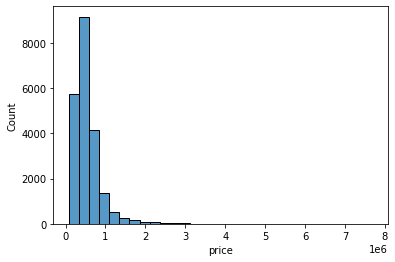

In [ ]:
sns.histplot(data=df, x="price", bins=30)

Una de las características más importantes que influye en el precio de la casa es su tamaño. Visualicemos eso usando `sns.scatterplot`

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

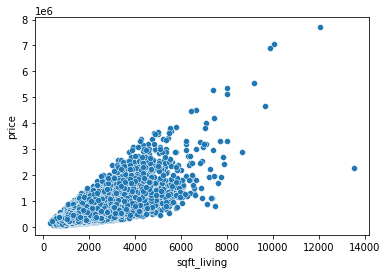

In [ ]:
sns.scatterplot(data=df, x='sqft_living',y='price')

La dependencia de precio de la case de su tamano es fuerte y es casi lineal.

También es interesante ver cómo la ubicación geográfica de la casa influye en su popularidad. Grafiquemos la longitud frente a la latitud pero incluyendo la distribución usando `sns.jointplot()` 

In [ ]:
df2=df[df['price']>2000000]


Latitude:	

47.6299489
Longitude:	

-122.2199372
DMS:	

47º 37' 47.8164'' N

122º 13' 11.7732'' W

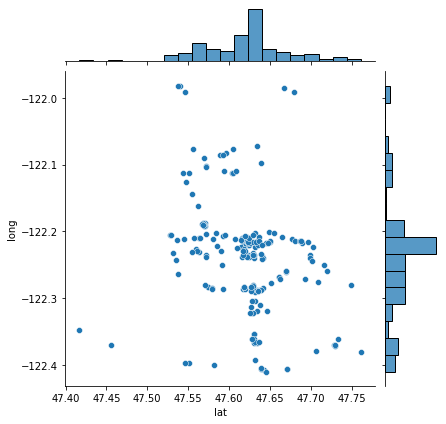

In [ ]:
sns.jointplot(data=df2, x="lat", y="long")

Para la latitud entre -47.7 y -48.8 hay muchas casas, lo que significaría que tal vez sea una ubicación ideal. Pero cuando hablamos de longitud podemos ver que la concentración es alta entre -122.2 a -122.4. Lo que significaría que la mayoría de las compras han sido para esta ubicación en particular.

Para ver la dependencia entre varias características de la casa, debemos seleccionar las características que nos interesan y trazar todas las combinaciones posibles usando `sns.pairplot()` 

In [ ]:
df_selection=df[['price', 'bedrooms','sqft_living']]

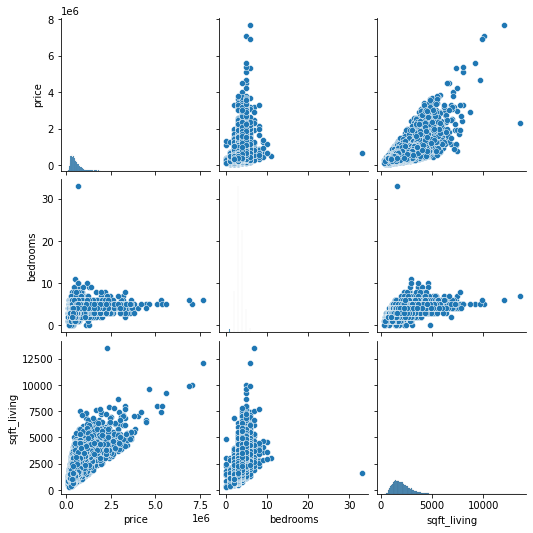

In [ ]:
sns.pairplot(df_selection)

aquí pudimos ver como cada variable depende una de la otra. Por ejemplo se ve claramente la distribución del precio de la vivienda con respecto al número de dormitorios. Pero también que el tamaño de la casa (en promedio) depende del número de dormitorios. 

## 5. Series de tiempo (time series)


Veamos ahora cómo influye la época del año en la venta de las casas.
Primero debemos convertir la columna `date` que (contiene la fecha de venta de la casa) en un formato de datos Pandas adecuado.

In [ ]:
df.head()['date']

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

*Si la columna `date` en el conjunto de datos original contenía una hora de venta, la función pd.to_datetime() también convertiría ese valor. 

In [ ]:
df.head()['date']

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

Podríamos usar de nuevo el diagrama de dispersión sns.

/usr/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date', ylabel='price'>

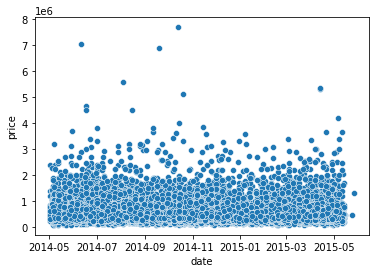

In [ ]:
sns.scatterplot(data=df,x='date', y='price')

Ya tenemos los datos en el formato correcto, pero la trama no es muy significativa. Dividamos entonces la fecha en año, mes y día.

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year   # attribute year
df['month'] = pd.DatetimeIndex(df['date']).month # attribute month
df['day'] = pd.DatetimeIndex(df['date']).day     # attribute day

Observe que hemos creado nuevas columnas llamadas `año`, `mes` y `día` en el conjunto de datos 

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,Seattle,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,Seattle,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,Kenmore,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,Seattle,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,Sammamish,2015,2,18


Vamos agrupar los datos con respecto a ano, mes y dia separadamente y calcular valor promedio de precio. 

In [ ]:
#df.groupby('year').mean()['price']
df.groupby('month').mean()['price']
#df.groupby('day').mean()['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544949.980995
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

Vamos ahora visualizar los resultados usando matplotlib. Miramos el precio de la casa frente al año, el precio de la casa frente al mes y el precio de la casa frente al día.

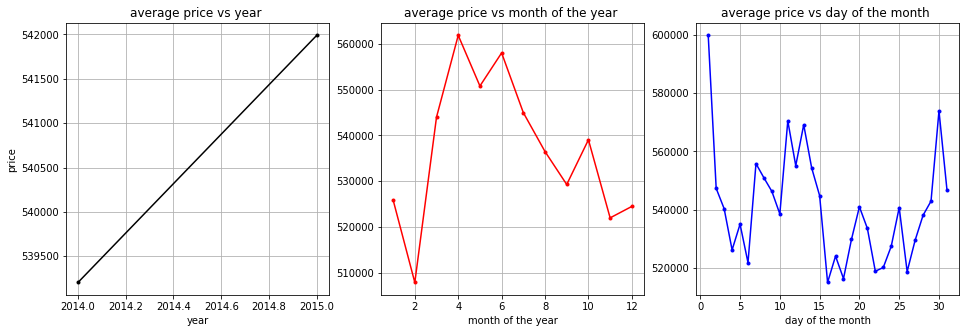

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(16,5))

ax[0].plot(df.groupby('year').mean()['price'],'.-k')
ax[0].set_title('average price vs year ')
ax[0].set_xlabel('year')
ax[0].set_ylabel('price')
ax[0].grid(True)


ax[1].plot(df.groupby('month').mean()['price'],'.-r')
ax[1].set_title('average price vs month of the year ')
ax[1].set_xlabel('month of the year')
ax[1].grid(True)

ax[2].plot(df.groupby('day').mean()['price'],'.-b')
ax[2].set_title('average price vs day of the month ')
ax[2].set_xlabel('day of the month')
ax[2].grid(True)
#df2=df.groupby( 'month' ).mean()['price'].to_frame(name = 'count').reset_index()

Usando series de tiempo, ahora es mucho más fácil ver que el precio promedio de la casa aumentó durante el año, también que el precio promedio de la casa fue mucho más alto en abril-junio que al final o al principio del año. Sobre todo parece (con cierta incertidumbre) que el precio medio de la vivienda fue más alto a principio del mes y mas baja en la mitad del mes.

Las series de tiempo en Pandas permiten modificaciones muy flexibles. Si, por ejemplo, estuviéramos interesados en saber cuántas casas se vendieron en el año 2014 en comparación con 2015, simplemente podríamos seleccionar el rango de fechas que nos interesa usando 'entre':

In [ ]:
df_2014=df[df['date'].between('2014-01-01', '2014-12-31')]

In [ ]:
df_2015=df[df['date'].between('2015-01-01', '2015-12-31')]

In [ ]:
print(f'Pudimos ver que en 2014 se vendieron: {df_2014.shape[0]} casas y en 2015:  {df_2015.shape[0]}') 

Pudimos ver que en 2014 se vendieron: 14632 casas y en 2015:  6980


Ahora guardemos el marco de datos actual en un nuevo archivo csv más limpio

In [ ]:
df.to_csv('data/kc_house_data_new.csv',sep=',',index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4710cf8b-f7ec-43d1-a3bc-46d860c0e6af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>